# Batch validation of Google AutoML vision API
This notebook call Google AutoML vision API for every pictures in a directory to check the prediction and display the image if the prediction is wrong.

In [48]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [58]:
import sys
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/ben/.gsutil/credentials-automl.json'

from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2
from google.protobuf.json_format import MessageToJson

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix
from fastai.plots import *
import numpy as np
PATH = "../../datasets/boeing_vs_airbus/"

def get_file_list(directory):
 return [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk(directory)] for val in sublist]


def get_prediction(content, project_id, model_id):
  prediction_client = automl_v1beta1.PredictionServiceClient()

  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'image': {'image_bytes': content }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned

def compute_stats(cm, classes):
    #print(cm)
    plot_confusion_matrix(cm, classes)
    # precission = VP / (VP + FP)
    precision = cm[0][0]/(cm[0][1]+cm[0][0]);
    print("Precision : ", precision)
    # recall =  = VP / (VP + FN)
    recall = cm[0][0]/(cm[1][0]+cm[0][0]);
    print("Recall : ", recall)
    F1 = 2 * ((precision*recall)/(precision + recall))
    print("F1 : ", F1)
    F2 = 5 * ((precision*recall)/(4*precision + recall))
    print("F2 : ", F2)

def check_prediction(classe):
    error = 0
    #content = "gs://causal-plating-174112-vcm/747_vs_A380/train/747/95.af_747cargo_02_535397.jpg"
    files = get_file_list(f'{PATH}valid/' + classe)
    print("Input images number : ", len(files))
    csv = ""
    for image in files:
        #print(image)
        with open(image, 'rb') as ff:
            content = ff.read()
        pred = get_prediction(content, "causal-plating-174112", "ICN1845979794395276999")
        for result in pred.payload:
            #print(image, "predicted to be a ", result.display_name, " at ", result.classification.score)
            if classe != result.display_name:
                print("PREDICTION ERROR for", image, "with score", str(result.classification.score))
                error += 1
                img=mpimg.imread(image)
                imgplot = plt.imshow(img)
                plt.show()
                csv += image + ";" + classe + ";" + result.display_name + ";" + str(result.classification.score) + ";0\n"
            else:
                csv += image + ";" + classe + ";" + result.display_name + ";" + str(result.classification.score) + ";1\n"
            #print(csv)
        #break
    f = open("autoML-"+classe+"-result.csv", "w")
    f.write(csv)
    f.close()
    print(error, "errors on", len(files), "predictions for", classe)
    return error, len(files)

Input images number :  155
PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/43.image.jpg with score 0.9360881447792053


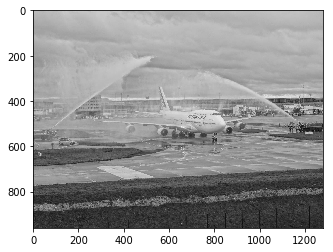

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/447.ef1damage1.jpg with score 0.9930036664009094


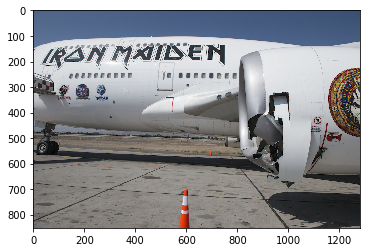

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/470.ren_trabelsi_djerba.jpg with score 0.9954627156257629


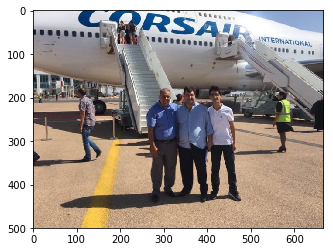

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/506.gty-trmp-plane-tarmac-mem-161206_12x5_1600-300x300.jpg with score 0.8169703483581543


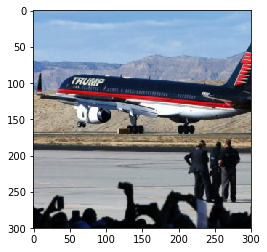

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/628.640-8e6380dade932e47087c73625e696e08.jpg with score 0.804530680179596


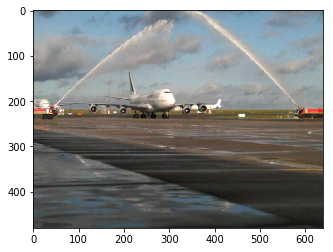

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/589.tqpw.jpg with score 0.9434650540351868


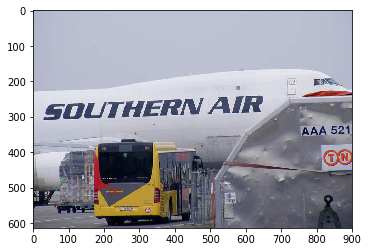

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/476.img_6945.jpg with score 0.6745906472206116


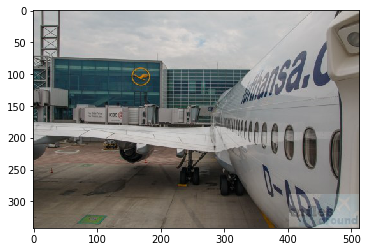

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/B747/584.article-0-12dea428000005dc-470_634x422.jpg with score 0.853929340839386


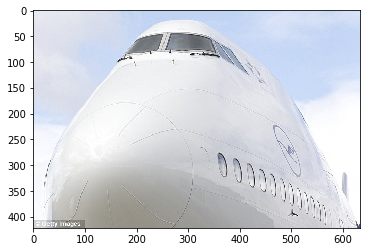

8 errors on 155 predictions for B747
Input images number :  155
PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/93.airbus-a380-for-emirates-before-completion-on-the-tarmac-finkenwerder-picture-id533768074s612x612.jpg with score 0.530537486076355


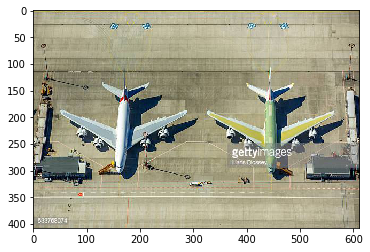

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/81.2018-06-05t094602z_1_lynxnpee540tp_rtroptp_3_tarmac-aerosave-recycling-plane.jpg with score 0.9807222485542297


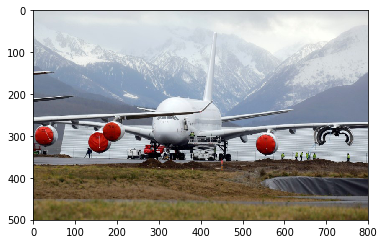

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/206.an-emirates-airbus-a380-plane-taxies-on-tarmac-after-touchdown-at-the-picture-id113234885k6m113234885s612x612w0h6bsxwossge2b9tbjlrkpwp6agusfp9b8b7bymrc4kle.jpg with score 0.7280665040016174


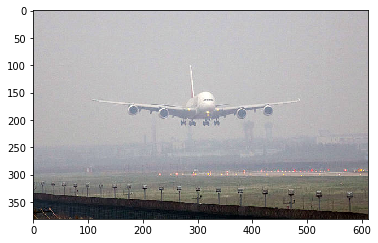

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/124.stock-photo-los-angeles-california-july-singapore-airlines-airbus-a-on-the-tarmac-at-los-angeles-457675852.jpg with score 0.9924057126045227


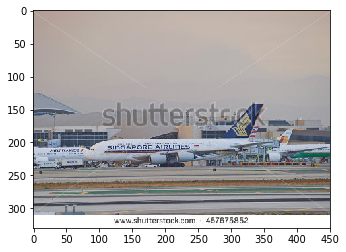

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/66.pneus-d-avion-d-airbus-79201797.jpg with score 0.837666928768158


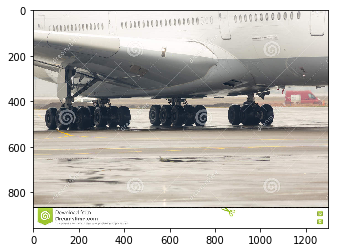

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/137.aerial-view-airbus-a380-for-emirates-before-finishing-on-the-tarmac-faeban.jpg with score 0.7375237345695496


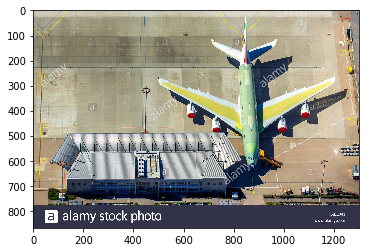

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/51.head-on-airbus-a380-on-tarmac-runway-photo-art-print-poster-18x12.jpg with score 0.9681262969970703


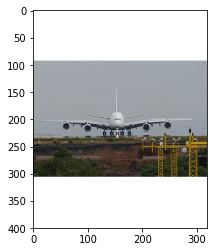

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/144.16566417.jpg with score 0.6997661590576172


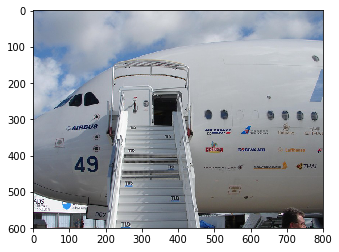

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/123.photo_1328692621415-1-0.jpg with score 0.8290145397186279


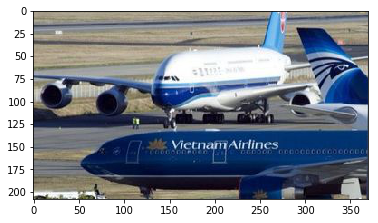

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/74.ibr-4196179.jpg with score 0.652957558631897


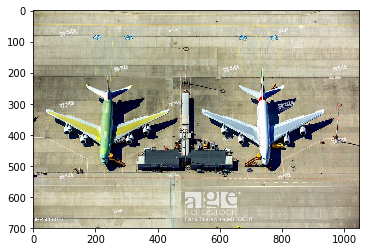

PREDICTION ERROR for ../../datasets/boeing_vs_airbus/valid/A380/90.l-airbus-hier-sur-le-tarmac-de-l-aeroport-de-heathrow-a-londres-photo-afp-1433508674.jpg with score 0.7365158796310425


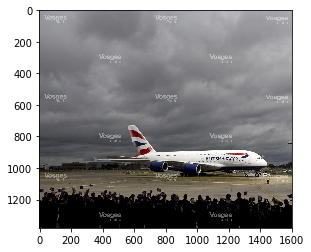

11 errors on 155 predictions for A380
[[147   8]
 [ 11 144]]
Precision :  0.9483870967741935
Recall :  0.930379746835443
F1 :  0.939297124600639
F2 :  0.9339263024142312


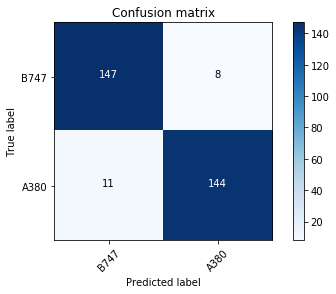

In [59]:
classes = ["B747", "A380"]
errors_B747, numbers_of_B747 = check_prediction(classes[0])
errors_A380, numbers_of_A380 = check_prediction(classes[1])
cm = np.array([[numbers_of_B747-errors_B747, errors_B747],[errors_A380, numbers_of_A380-errors_A380]])


[[147   8]
 [ 11 144]]
Precision :  0.9483870967741935
Recall :  0.930379746835443
F1 :  0.939297124600639
F2 :  0.9339263024142312


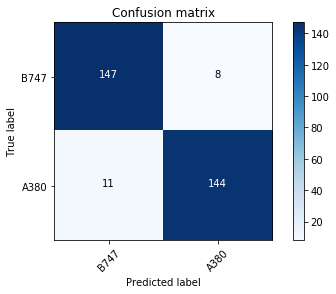

In [60]:
compute_stats(cm, classes)

11 + 8 = 19 errors. Well, to bo honest, 17 because there is a two times the same A380 image and a plane that is not a B747, nor an A380.